# Data Preprocessing 

In [1]:
import pandas as pd
import numpy as np

# for operation 2
df2 = pd.read_csv('diabetes_null.csv', na_values=['#NAME?'])

# Handling Missing Values

## Delete Row 

In [2]:
df1 = pd.read_csv('diabetes_null.csv', na_values=['#NAME?'])
df1.isnull().sum().sort_values(ascending=False)
df_no_missing = df1.dropna(axis=0)
print(df_no_missing.head(5))

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3             1     89.0           66.0           23.0     94.0  28.1   
4             0    137.0            4.0           35.0    168.0  43.1   
6             3     78.0            5.0           32.0     88.0  31.0   
8             2    197.0            7.0           45.0    543.0   3.5   
13            1    189.0            6.0           23.0    846.0   3.1   

    DiabetesPedigreeFunction  Age  Outcome  
3                      0.167   21        0  
4                      2.288   33        1  
6                      0.248   26        1  
8                      0.158   53        1  
13                     0.398   59        1  


# Fill with Mean

# Handling Noicy Data

# Function to find outliers

In [9]:
def find_outliers_tukey(x):
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values

In [10]:
glucose_indices, glucose_values = find_outliers_tukey(df1['Glucose'])
print("Outliers for Glucose")
print(np.sort(glucose_values))

print("Outliers for Pregnancies")
pr_indices, pr_values = find_outliers_tukey(df1['Pregnancies'])
print(np.sort(pr_values))

print("Outliers for BloodPressure")
bp_indices, bp_values = find_outliers_tukey(df1['BloodPressure'])
print(np.sort(bp_values))


print("Outliers for SkinThickness")
st_indices, st_values = find_outliers_tukey(df1['SkinThickness'])
print(np.sort(st_values))

print("Outliers for Insulin")
in_indices, in_values = find_outliers_tukey(df1['Insulin'])
print(np.sort(in_values))

print("Outliers for BMI")
bmi_indices, bmi_values = find_outliers_tukey(df1['BMI'])
print(np.sort(bmi_values))

print("Outliers for DiabetesPedigreeFunction")
dpf_indices, dpf_values = find_outliers_tukey(df1['DiabetesPedigreeFunction'])
print(np.sort(dpf_values))

print("Outliers for Age")
age_indices, age_values = find_outliers_tukey(df1['Age'])
print(np.sort(age_values))

Outliers for Glucose
[]
Outliers for Pregnancies
[14 14 15 17]
Outliers for BloodPressure
[]
Outliers for SkinThickness
[63. 99.]
Outliers for Insulin
[375. 387. 392. 415. 465. 474. 478. 485. 495. 495. 543. 545. 579. 744.
 846.]
Outliers for BMI
[ 2.   2.1  2.4  2.4  2.8  2.8  3.   3.   3.   3.   3.   3.   3.   3.1
  3.1  3.1  3.1  3.1  3.1  3.1  3.1  3.1  3.2  3.3  3.4  3.4  3.4  3.4
  3.4  3.4  3.4  3.5  3.5  3.5  3.5  3.5  3.5  3.5  3.7  3.8  3.8  3.8
  3.8  3.8  3.8  3.8  3.8  3.8  3.9  3.9  3.9  3.9  3.9  4.   4.   4.1
  4.2  4.5  4.5  4.5  4.6  4.6  4.6  4.6  4.7  4.8  4.9  4.9  5.  52.3
 52.3 52.9 53.2 55.  57.3 59.4 67.1]
Outliers for DiabetesPedigreeFunction
[1.251 1.258 1.268 1.282 1.292 1.318 1.321 1.34  1.353 1.39  1.391 1.394
 1.4   1.441 1.461 1.476 1.57  1.6   1.698 1.699 1.72  1.731 1.76  1.781
 1.893 1.95  1.96  2.137 2.288 2.329 2.42 ]
Outliers for Age
[62 62 62 62 63 63 63 63 64 65 65 65 66 66 66 66 67 67 67 68 69 69 72 81]


# Deleting Row

In [11]:
df_del = df1.drop(bp_indices)
print(df_del.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0            4.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627    5        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


# Replace with min

In [12]:
min_in = np.min(df_del['Insulin'])
df_del['Insulin'] = np.where(df_del['Insulin'] > 321, min_in, df_del['Insulin'])
print(df_del.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0            4.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627    5        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [14]:
import matplotlib.pyplot as plt
df_del.hist()
plt.show()

<Figure size 640x480 with 9 Axes>

# Density Plots 

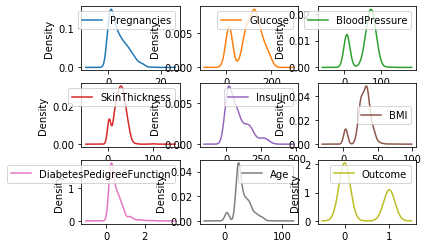

In [15]:
df_del.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

# BoxPlot

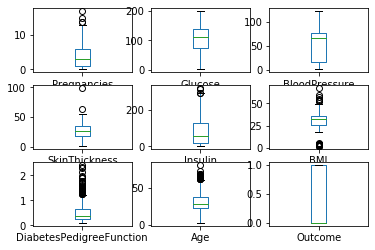

In [16]:
df_del.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

# Correlation Matrix

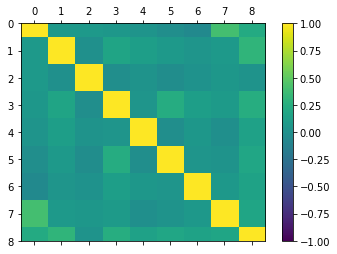

In [17]:
cor = df_del.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cor, vmin=-1, vmax =1)
fig.colorbar(cax)
ticks=np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

# Scatter Plot

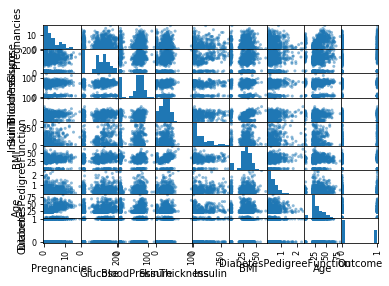

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_del)
plt.show()